In [ ]:
Pipeline
PCA(principal component analysis)

In [ ]:
Pipelining

=> aru model ma pahila split scaling garxxau then model fit garney 
=> scaling garxam and fit garxau xutaa xuttae
=> hami autae ma garna sakxau used pipeline for this

In [33]:
from sklearn.pipeline import Pipeline
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df=df.rename(columns={
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)':'spend_score'}
            )

In [11]:
df.head()

,CustomerID,Genre,Age,annual_income,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
x=df[['annual_income' , 'spend_score']]
x.head()

,annual_income,spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
#Scaling beacause it is distance based algorithm
scaler=StandardScaler()
xscaled=scaler.fit_transform(x)

In [14]:
xscaled=pd.DataFrame(xscaled, columns=x.columns)
xscaled.head()

,annual_income,spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [17]:
km=KMeans(n_clusters=4)
km.fit(xscaled)

C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

KMeans(n_clusters=4)

In [18]:
km.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [19]:

km.cluster_centers_

array([[-1.2398605 ,  1.01055509],
       [ 0.28182002,  0.45296704],
       [-1.14183232, -0.90692175],
       [ 1.02054738, -1.24795579]])

In [20]:
centers=pd.DataFrame(km.cluster_centers_ , columns=['p1' ,'p2'])
centers.head()

,p1,p2
0,-1.239861,1.010555
1,0.281820,0.452967
2,-1.141832,-0.906922
3,1.020547,-1.247956


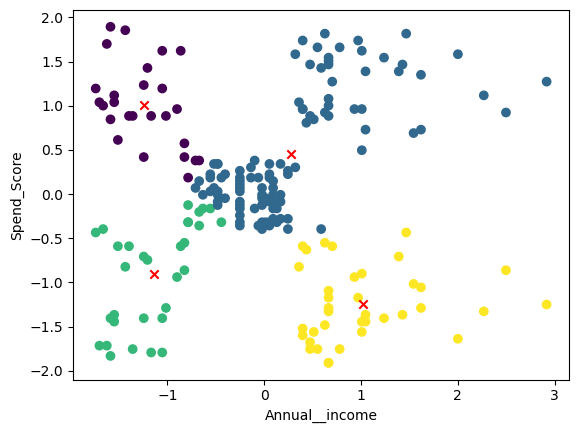

In [21]:
plt.scatter(xscaled.annual_income, xscaled.spend_score, c=km.labels_) 
plt.scatter(centers.p1 , centers.p2, color='red' , marker='x')
plt.xlabel('Annual__income')
plt.ylabel('Spend_Score')
plt.show()

In [22]:

df['labels']=km.labels_
df.head()

,CustomerID,Genre,Age,annual_income,spend_score,labels
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


In [24]:
df_cluster0=df[df['labels']==0]
df_cluster0.head()

,CustomerID,Genre,Age,annual_income,spend_score,labels
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0


In [26]:
count=df_cluster0['Genre'].value_counts()
count

Genre
Female    15
Male      11
Name: count, dtype: int64

In [27]:
df_cluster0['Age'].describe()

count    26.000000
mean     28.038462
std       9.429659
min      18.000000
25%      22.000000
50%      24.000000
75%      31.000000
max      59.000000
Name: Age, dtype: float64

In [28]:
df_cluster1=df[df['labels']==1]

In [29]:
df_cluster1.head()

,CustomerID,Genre,Age,annual_income,spend_score,labels
50,51,Female,49,42,52,1
52,53,Female,31,43,54,1
56,57,Female,51,44,50,1
58,59,Female,27,46,51,1
60,61,Male,70,46,56,1


In [30]:
count1=df_cluster1['Genre'].value_counts()

In [32]:
df_cluster1['Age'].describe()

count    106.000000
mean      39.066038
std       14.591105
min       18.000000
25%       29.000000
50%       35.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [35]:
pipeline_model=Pipeline([
    ('scaler', StandardScaler()),
    ('km',KMeans(n_clusters=4))
]) 
#=> by using pipeline we can do scaling and fiiting at once

In [36]:
pipeline_model.fit(x)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('km', KMeans(n_clusters=4))])

In [ ]:
### PCA (Principal Component Analysis) is a technique used to reduce the number of features (dimensions) in your dataset 
while keeping as much important information as possible.

# PCA


In [ ]:
> in pca we need the scaling of the data
-> to reuse the dimension of data
-> data:large number of columns
-> PCA (Principal Component Analysis) is a technique used to reduce the number of features (dimensions) 
in your dataset while keeping as much important information as possible.

# Why PCA?

In [ ]:
-> Imagine you have a dataset with lots of columns (features) — many of them may be:
-> Redundant (similar to each other)
-> Not contributing much
-> Making the model slow or less accurate
-> PCA helps you compress the data into fewer dimensions without losing much useful information.

In [ ]:
Pipelining generally refers to a technique used in machine learning where multiple stages of a process
are connected in a sequence, with the output of one stage serving as the input to the next.

In [ ]:
#PCA = to reduce the dimension of data

In [ ]:
Data:large number of columns xh vnye we can reduce it by using PCA
=>PCA le jun dataset baunch  tyo orginal data ko sabae column ko information hunch

In [38]:
data=pd.read_csv('Wine.csv')
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
data.shape

(178, 14)

In [40]:
data['class'].unique()

array([1, 2, 3], dtype=int64)

In [41]:

df=data.drop('class', axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
from sklearn.decomposition import PCA  


In [44]:
pca=PCA(n_components=5) ## 13 0ta columns bata 5 ota new combined columns  banaunxa 
dfn=pca.fit_transform(df)

In [ ]:
dfn

In [ ]:
 two method to choose the number of columns in the pca 
-kaiser rule
-scree plot

In [47]:

pca=PCA()
dfn=pca.fit_transform(df)

In [48]:
dfnew=pd.DataFrame(dfn)
dfnew

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,-3.130735,0.250114,-0.677078,0.568081,0.619642,0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,-6.822835,0.864035,0.486096,0.014340,-0.108865,-0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,1.113223,-0.912411,-0.380651,0.672404,-0.785819,0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,0.917257,0.541251,-0.858662,0.599122,-0.018770,-0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,0.554422,-1.360896,-0.276442,0.768884,0.309976,-0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,2.474707,3.155920,2.348927,1.439001,0.026425,-0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,4.309931,1.562181,1.168003,0.128679,-0.003859,0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,2.237577,4.820708,1.057336,0.215000,-0.648489,-0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,1.788392,3.709352,0.276956,-1.009229,-0.414948,0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


In [49]:
#Kaiser Rule= See the eigen values and select those who have eigen values more than 1

In [50]:
eigenvalues=pca.explained_variance_
eigenvalues

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

In [ ]:
# mathi ko bat no optimal column liney